In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the dataset
athlete=pd.read_csv("athlete_events.csv")
region=pd.read_csv("noc_regions.csv")

In [3]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#merge two datasets
df=athlete.merge(region,how='left',on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
#checking the size of merged dataframe
df.shape

(271116, 17)

In [7]:
#rename some columns, make then consistent
df.rename(columns={"region":"Region","notes":"Notes"},inplace=True)

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
#checking the datatypes of all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
# 5-number summary of all numerical attributes
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
#checking for null values
nan_values=df.isna()
nan_col=nan_values.any()
nan_col

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
#checking the count of null values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [61]:
#filling the numerical NaN values with mean of respective attributes
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df['Height'].fillna(value=df['Height'].mean(), inplace=True)
df['Weight'].fillna(value=df['Weight'].mean(), inplace=True)

In [63]:
# output for dataset where team is India
df.query('Team=="India" ').head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.000000,167.00000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
898,512,Shiny Kurisingal Abraham-Wilson,F,23.000000,167.00000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
899,512,Shiny Kurisingal Abraham-Wilson,F,27.000000,167.00000,53.000000,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,India,NaN
900,512,Shiny Kurisingal Abraham-Wilson,F,31.000000,167.00000,53.000000,India,IND,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
1183,663,Sharath Kamal Achanta,M,22.000000,186.00000,85.000000,India,IND,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN
1184,663,Sharath Kamal Achanta,M,26.000000,186.00000,85.000000,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN


In [64]:
#output when team is Japan
df.query('Team=="Japan" ').head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN
633,367,Masashi Abe,M,22.0,175.0,64.0,Japan,JPN,1988 Winter,1988,Winter,Calgary,Nordic Combined,Nordic Combined Men's Team,NaN,Japan,NaN
634,367,Masashi Abe,M,22.0,175.0,64.0,Japan,JPN,1988 Winter,1988,Winter,Calgary,Nordic Combined,Nordic Combined Men's Individual,NaN,Japan,NaN
635,367,Masashi Abe,M,26.0,175.0,64.0,Japan,JPN,1992 Winter,1992,Winter,Albertville,Nordic Combined,Nordic Combined Men's Individual,NaN,Japan,NaN
636,367,Masashi Abe,M,28.0,175.0,64.0,Japan,JPN,1994 Winter,1994,Winter,Lillehammer,Nordic Combined,Nordic Combined Men's Team,Gold,Japan,NaN
637,367,Masashi Abe,M,28.0,175.0,64.0,Japan,JPN,1994 Winter,1994,Winter,Lillehammer,Nordic Combined,Nordic Combined Men's Individual,NaN,Japan,NaN


In [65]:
# top 10 countries which participate
top_10=df.Team.value_counts().sort_values(ascending=False).head(10)
top_10

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot: title={'center': 'Top 10 Countries by Participation'}, ylabel='Team'>

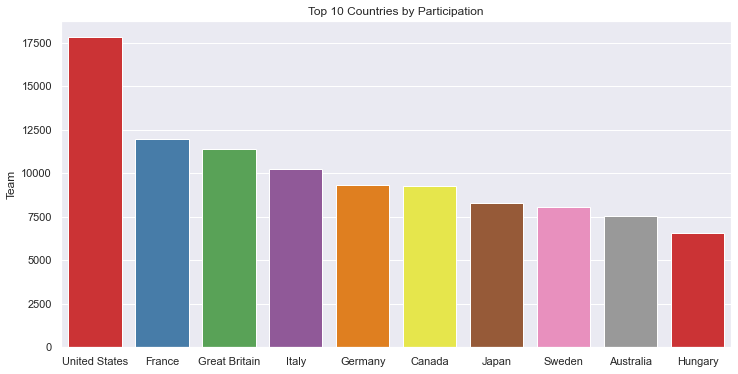

In [66]:
#plotting top 10 contries
plt.figure(figsize=(12,6))
plt.title("Top 10 Countries by Participation")
sns.barplot(x=top_10.index,y=top_10,palette="Set1")

<AxesSubplot: title={'center': 'Age Distribution of the Athletes'}, xlabel='Age', ylabel='Number of Participants'>

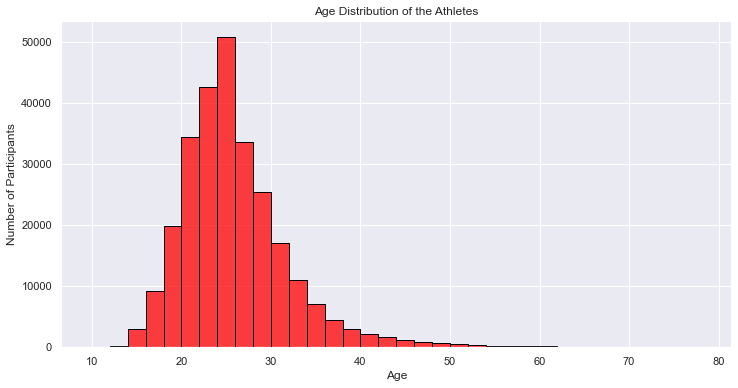

In [67]:
#plotting the age distribution of the athletes 
plt.figure(figsize=(12,6))
plt.title("Age Distribution of the Athletes")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
sns.histplot(df.Age,bins=np.arange(10,80,2),color="red",edgecolor="black")

In [68]:
#listing all the summer sports
winter_sport=df[df.Season=="Winter"].Sport.unique()
winter_sport

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [69]:
#listing all the winter sports
summer_sport=df[df.Season=="Summer"].Sport.unique()
summer_sport

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [70]:
gender=df.Sex.value_counts()
gender

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x20527603100>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')])

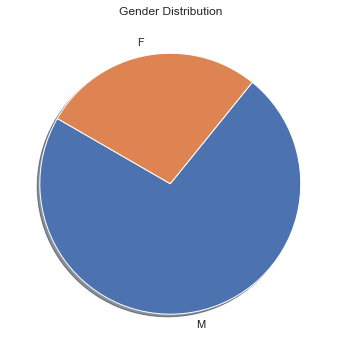

In [71]:
#pie chart of the gender distribution 
plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender,labels=gender.index,startangle=150,shadow=True)

In [72]:
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [73]:
#counting the number of females year-wise who took part in the summer olympics
female=df[(df.Sex=='F') & (df.Season=="Summer")][['Sex','Year']]
female=female.groupby('Year').count().reset_index()
female

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


In [74]:
womenolym=df[(df.Sex=="F") & (df.Season=="Summer")]

Text(0.5, 1.0, 'Women Participation')

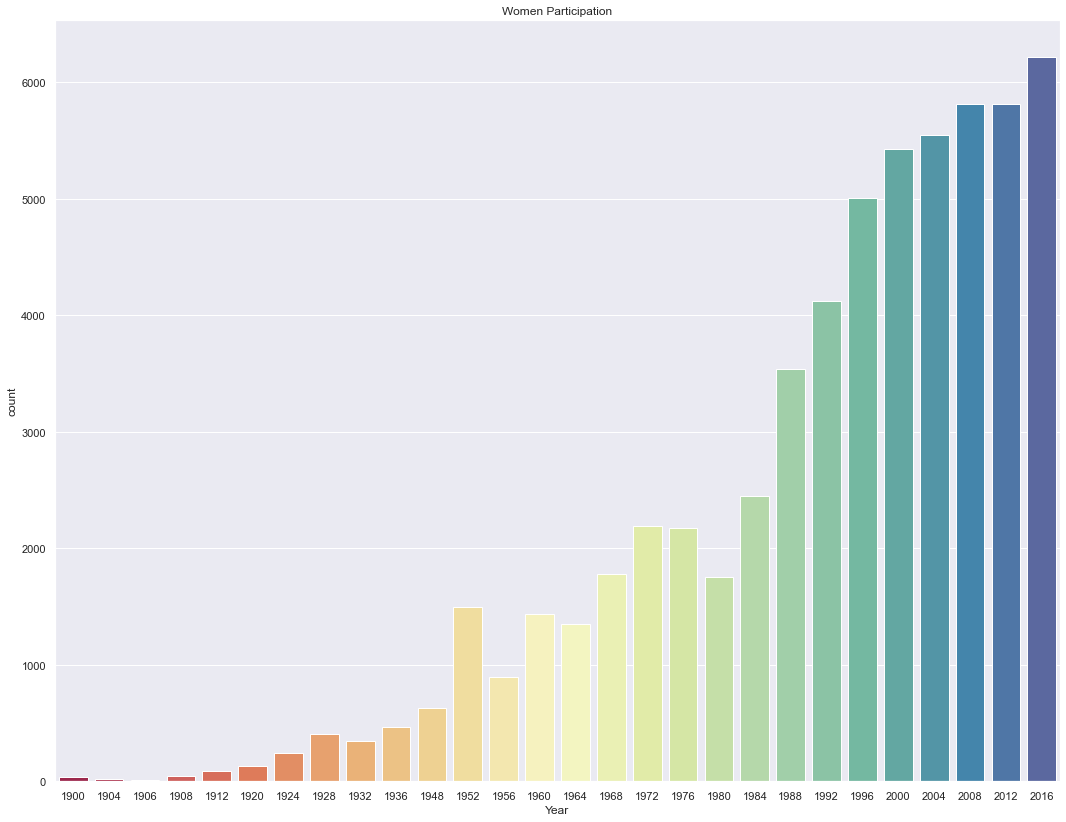

In [75]:
#part plot showing the participation of women over the years
sns.set(style="darkgrid")
plt.figure(figsize=(18,14))
sns.countplot(x="Year",data=womenolym,palette="Spectral")
plt.title("Women Participation")


### We observe that the Women Participation shows a good increase over the years except for some years like 1956,1980 

Text(0.5, 1.0, 'Women Participation')

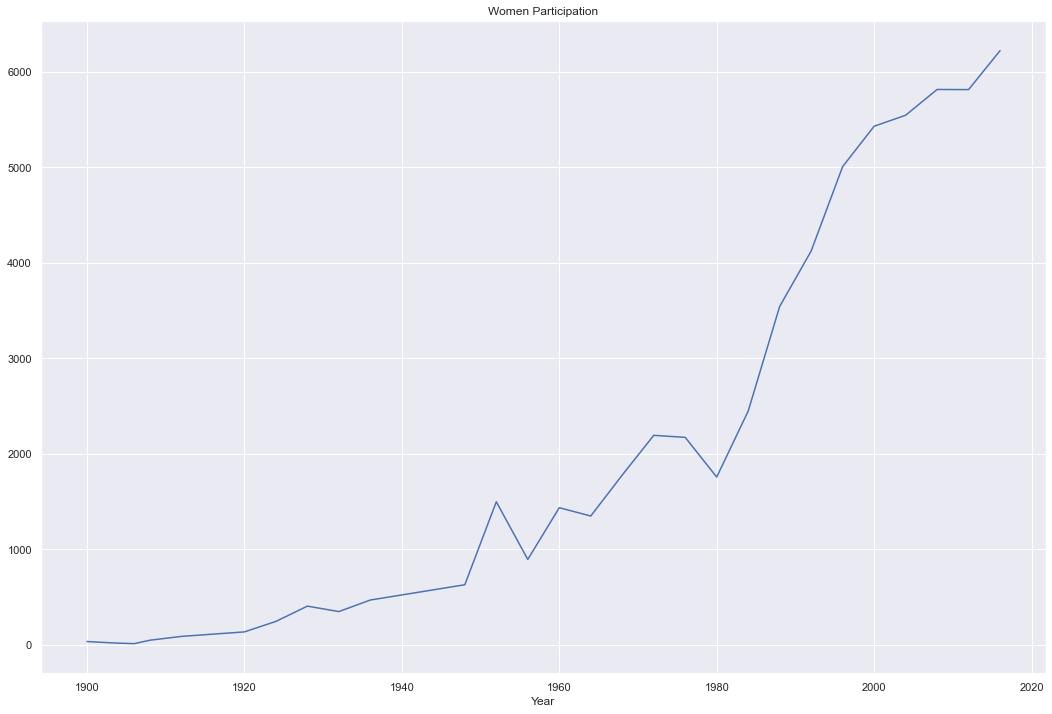

In [76]:
#line chart
part=womenolym.groupby("Year")['Sex'].value_counts()
plt.figure(figsize=(18,12))
part.loc[:,'F'].plot()
plt.title("Women Participation")

In [77]:
#dataframe consisting of athletes who won gold medals
gold=df[df.Medal=="Gold"]
gold.head()
#gold.size

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.00000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [78]:
gold=gold[np.isfinite(gold["Age"])]

In [79]:
#number of athletes who won gold medals and whose age is above 60
gold['ID'][gold['Age']>60].count()

6

In [80]:
#sporting events in which athletes above the age of 60 won gold medals
event=gold['Sport'][gold['Age']>60]
event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

In [81]:
#countries who won maximum number of gold medals
gold.Region.value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


In [82]:
max_year=df['Year'].max()
max_year

2016

In [83]:
#countries which won the most gold medals in Rio Olympics 2016
teams=df[(df['Year']==max_year) & (df['Medal']=='Gold')].Team
teams.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise Gold Medals')

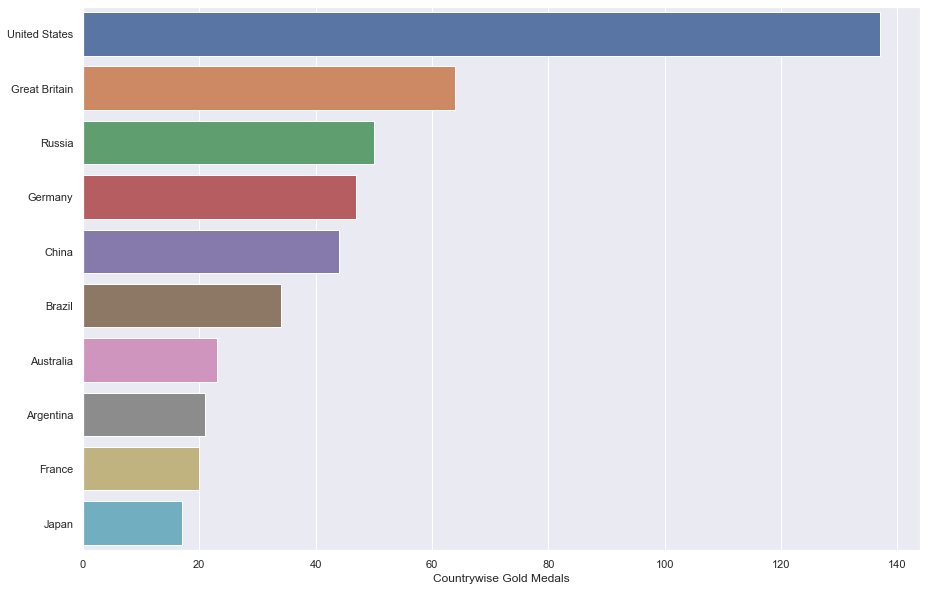

In [84]:
plt.figure(figsize=(15,10))
sns.barplot(x=teams.value_counts().head(10),y=teams.value_counts().head(10).index)
plt.xlabel("Countrywise Gold Medals")